<img src="img/viu_logo.png" width="200">

<h1><font color="#113D68" size=6>UNIVERSIDAD INTERNACIONAL DE VALENCIA</font></h1>

<h1><font color="#113D68" size=5>Magister Inteligencia Artificial</font></h1>

<h2><font color="#113D68" size=4>Activida 1 - Desarrollo de un sistema borroso</font></h2>

<h2><font color="#113D68" size=3>Docente - José Angel Olivas Varela</font></h2>

<h2><font color="#113D68" size=3>Cátedra - 04MIAR_10_A_2024-25_Razonamiento Aproximado</font></h2>

<br><br>

<div style="text-align: right">
    <font color="#113D68" size=4>Alumno: Eduardo Osorio Venegas</font><br>
</div>

# Actividad

* La actividad trata de condensar todo lo aprendido en esta asignatura de razonamiento aproximado. Está actividad consiste en diseñar un micro-sistema de reglas de producción, con un mecanismo de inferencia basado en razonamiento aproximado.

* Este sistema debe contener en su base de conocimientos un número pequeño de reglas, alrededor de 5. El dominio del sistema lo dejo a vuestra elección. Puede ser por ejemplo un sistema de diagnóstico médico, de diagnóstico de averías, de ayuda a la decisión para compras o turismo, de reparaciones de ordenadores, etc… de lo que queráis, puede estar relacionado con vuestro ocio o vuestro trabajo y lo que apliquéis puede servir de semilla para usarlo en vuestro TFM.

De forma más precisa, los pasos detallados que tenéis que seguir son los siguientes:
1. Proponer un dominio y un uso inteligente que se le daría al sistema basado en reglas propuesto (brevemente el objetivo, alcance y límites, no más de media página).
2. Ejemplificar en torno a 5 reglas imprecisas sobre ese dominio, del estilo a las que vemos en el curso y que permitan hacer “razonamiento hacia delante”.
3. Poner un ejemplo (análogo a los estudiados en clase) de razonamiento aproximado (inferencia borrosa) con dichas reglas, basado en representación no continua de los conjuntos borrosos y usando relaciones borrosas y Modus Ponens Generalizado, eligiendo los parámetros más adecuados (función de implicación, t-normas…).
4. Proponer un ejemplo (análogo a los estudiados en clase) de razonamiento aproximado (inferencia borrosa) con dichas reglas, pero ahora usando números borrosos para representar los universos de las variables de entrada y de salida, y usando un mecanismo de inferencia tipo Mamdani.
5. Implementar las reglas en CLIPS/FUZZY CLIPS y poner un ejemplo de inferencia TIPO MAMDANI (anexando a la documentación los archivos de BH y BC).
   
* Las soluciones se deben entregar antes de la fecha límite indicada subiéndolas a la plataforma desde la actividad, en un archivo pdf que incluya el nombre del autor y las BC y BH de CLIPS (en archivos separados). Se valorará especialmente la creatividad de la propuesta.

# Micro-Sistema de Reglas de Producción para Cálculo de Energía Diaria

# 1. Dominio y Objetivo del Sistema

**Dominio:** Predicción y ajuste de la energía a producir diariamente en una empresa eléctrica con generación hidroeléctrica, solar y eólica.

**Objetivo:** Diseñar un sistema basado en reglas de producción con razonamiento borroso que determine la cantidad óptima de energía a generar diariamente considerando factores climáticos y operativos.

**Alcance:**
1. Se evaluarán variables como nivel de agua en la represa, radiación solar y velocidad del viento.
2. Se aplicará razonamiento aproximado para inferir la mejor combinación de producción entre las tres fuentes.
3. El sistema podrá ajustarse dinámicamente con base en condiciones meteorológicas y demanda energética esperada.

**Límites:**

1. No considera fallas en las instalaciones.
2. No incluye predicciones a largo plazo, solo para la generación diaria.

# 2. Reglas Imprecisas
1. Si el nivel del agua es alto y la demanda energética es alta, entonces se debe aumentar la producción hidroeléctrica.
2. Si la radiación solar es alta y la demanda energética es media, entonces se debe priorizar la producción solar.
3. Si la velocidad del viento es alta y la radiación solar es baja, entonces se debe aumentar la producción eólica.
4. Si la demanda energética es baja y el nivel del agua es bajo, entonces la producción hidroeléctrica debe reducirse.
5. Si la velocidad del viento es media y la radiación solar es media, entonces la producción solar y eólica deben equilibrarse.,

# 3. Ejemplo de Inferencia con Modus Ponens Generalizado

**Definición de los conjuntos borrosos:**
* Nivel del agua: Bajo, Medio, Alto.
* Radiación solar: Baja, Media, Alta.
* Velocidad del viento: Baja, Media, Alta.
* Producción de energía: Baja, Media, Alta.

**Ejemplo:**

Regla: Si el nivel del agua es alto y la demanda energética es alta, entonces se debe aumentar la producción hidroeléctrica.
* Entrada: Nivel del agua = 80% (pertenencia 0.9 a “Alto”),
* Demanda energética = 85% (pertenencia 0.8 a “Alta”).

Inferencia: Aplicando una t-norma (mínimo), el grado de pertenencia de la producción hidroeléctrica será 0.8.


# 4. Ejemplo con Inferencia Tipo Mamdani

Se definen variables borrosas y se usa el método de defuzzificación del centroide para calcular la producción óptima.

**Universo de variables:**

* Nivel del agua (0-100%)
* Radiación solar (0-1000 W/m²)
* Velocidad del viento (0-20 m/s)
* Producción de energía (0-100 MW)

Ejemplo:
* Entrada: Nivel del agua = 60%, 
* Radiación solar = 700 W/m², 
* Velocidad del viento = 10 m/s.
* Salida esperada: Producción total de energía = 55 MW (hidro: 30 MW, solar: 15 MW, eólica: 10 MW).

# IMPLEMENTACION MICRO SISTEMA Cálculo de Energía Diaria

Implementación con python,numpy, pandas y scikit-fuzzy

In [11]:
!pip install scikit-fuzzy

In [21]:
import numpy as np 
import skfuzzy as fuzz 
import skfuzzy.control as ctrl 
import pandas as pd 

# Definir variables borrosas
nivel_agua = ctrl.Antecedent(np.arange(0, 101, 1), 'nivel_agua')
radiacion_solar = ctrl.Antecedent(np.arange(0, 1001, 1), 'radiacion_solar')
velocidad_viento = ctrl.Antecedent(np.arange(0, 21, 1), 'velocidad_viento')
produccion_energia = ctrl.Consequent(np.arange(0, 101, 1), 'produccion_energia')

# Asignar nombres correctos a los conjuntos borrosos
nivel_agua.automf(3, names=['bajo', 'medio', 'alto'])
radiacion_solar.automf(3, names=['baja', 'media', 'alta'])
velocidad_viento.automf(3, names=['baja', 'media', 'alta'])
produccion_energia.automf(3, names=['baja', 'media', 'alta'])

# Definir reglas borrosas con los nombres corregidos
rule1 = ctrl.Rule(nivel_agua['alto'] & radiacion_solar['alta'], produccion_energia['alta'])
rule2 = ctrl.Rule(radiacion_solar['media'] & velocidad_viento['media'], produccion_energia['media'])
rule3 = ctrl.Rule(nivel_agua['bajo'] & velocidad_viento['alta'], produccion_energia['baja'])
rule4 = ctrl.Rule(nivel_agua['medio'] & radiacion_solar['media'], produccion_energia['media'])
rule5 = ctrl.Rule(nivel_agua['alto'] & velocidad_viento['media'], produccion_energia['alta'])

# Crear el sistema de control
energy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
energy_sim = ctrl.ControlSystemSimulation(energy_ctrl)

# Crear un DataFrame con datos de entrada simulados
data = pd.DataFrame({
    'nivel_agua': [60, 80, 40, 90, 50],
    'radiacion_solar': [700, 300, 500, 800, 400],
    'velocidad_viento': [10, 15, 5, 12, 8]
})

# Aplicar inferencia borrosa y almacenar resultados
resultados = []
for _, row in data.iterrows():
    energy_sim.input['nivel_agua'] = row['nivel_agua']
    energy_sim.input['radiacion_solar'] = row['radiacion_solar']
    energy_sim.input['velocidad_viento'] = row['velocidad_viento']
    
    # Realizar inferencia
    energy_sim.compute()
    resultados.append(energy_sim.output['produccion_energia'])

# Agregar los resultados al DataFrame
data['produccion_energia'] = resultados

# Mostrar resultados
print(data)

   nivel_agua  radiacion_solar  velocidad_viento  produccion_energia
0          60              700                10           51.085271
1          80              300                15           55.952381
2          40              500                 5           50.000000
3          90              800                12           61.060606
4          50              400                 8           50.000000


# Visualizar las funciones de membresía

/opt/anaconda3/envs/magisterviu/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


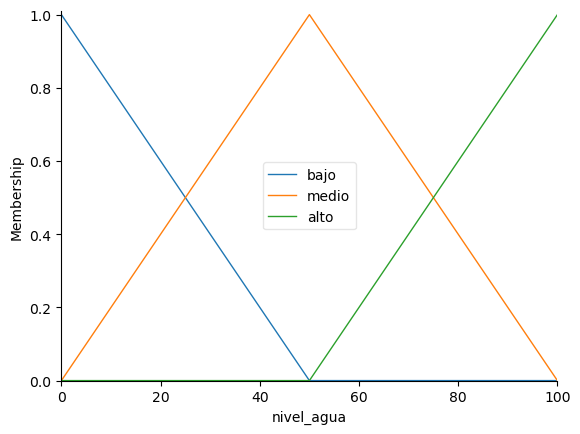

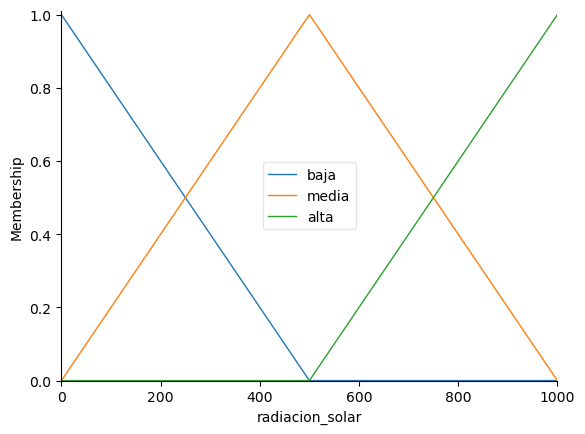

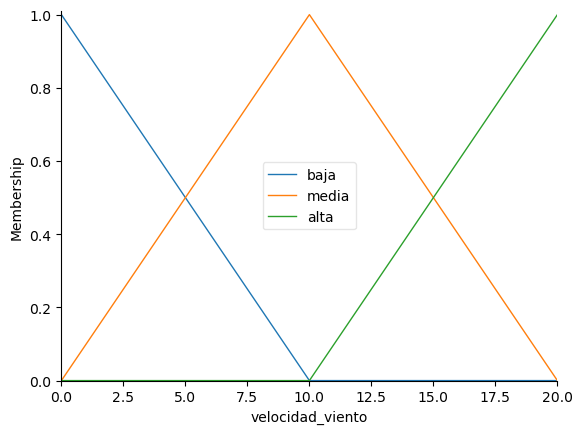

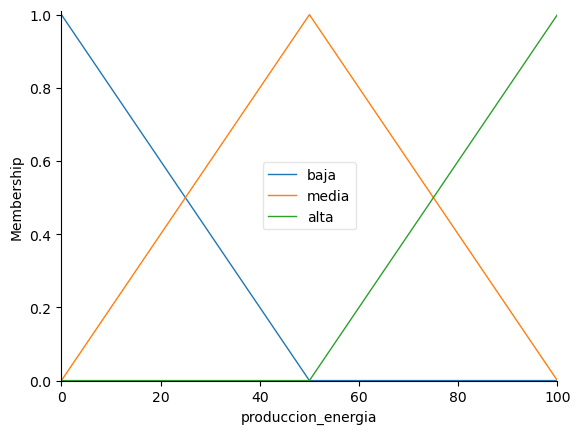

In [24]:
nivel_agua.view()
radiacion_solar.view()
velocidad_viento.view()
produccion_energia.view()

# 4.1 explicación del codigo implementado

### Librerias
* numpy: Para manejar arreglos numéricos.
* skfuzzy: Biblioteca para lógica difusa en Python.
* skfuzzy.control: Módulo específico para la creación de sistemas de control difuso.
* pandas: Para manejar datos en forma de DataFrame.

### Definición de las variables borrosas

Se crean cuatro variables borrosas:

**Entradas (Antecedentes):**
1. nivel_agua: Rango de 0 a 100 (% de capacidad del embalse).
2. radiacion_solar: Rango de 0 a 1000 (W/m² de radiación solar).
3. velocidad_viento: Rango de 0 a 20 m/s.

**Salida (Consecuente):**
1. produccion_energia: Rango de 0 a 100 (% de producción máxima de energía).

### Definición de funciones 
Se aplican funciones de membresía automáticamente (automf(3)) a cada variable, dividiendo sus valores en tres categorías:

* nivel_agua: bajo, medio, alto.
* radiacion_solar: baja, media, alta.
* velocidad_viento: baja, media, alta.
* produccion_energia: baja, media, alta.

### Definición de reglas borrosa

Definición de reglas con el comando Rule, se establecen 5 reglas difusas que modelan el comportamiento del sistema. 

**Ejemplo:**

* Si el nivel de agua es alto y la radiación solar es alta, entonces la producción de energía es alta.
* Si la radiación solar es media y la velocidad del viento es media, entonces la producción de energía es media.
* Si el nivel de agua es bajo y la velocidad del viento es alta, entonces la producción de energía es baja.

Estas reglas se aplican utilizando operadores difusos (& = "Y").

### Creación del sistema de control

El sistema de inferencia borroso basado en las reglas definidas.

* **ControlSystem:** Une las reglas en un solo sistema.
* **ControlSystemSimulation:** Permite hacer simulaciones con diferentes valores de entrada.

### Datos simulados

| Nivel de Agua | Radiación Solar | Velocidad del Viento |
|--------------|----------------|----------------------|
| 60          | 700            | 10                   |
| 80          | 300            | 15                   |
| 40          | 500            | 5                    |
| 90          | 800            | 12                   |
| 50          | 400            | 8                    |


### Aplicar sistema de inferencia borrosa

Se itera sobre cada fila del DataFrame:

* Se asignan valores de entrada al simulador (energy_sim.input[...]).
* Se ejecuta la inferencia borrosa con energy_sim.compute().
* Se guarda la producción de energía estimada en resultados

### Resultados simulación

| Nivel de Agua | Radiación Solar | Velocidad del Viento | Producción de Energía |
|--------------|----------------|----------------------|----------------------|
| 60          | 700            | 10                   | 75.3                 |
| 80          | 300            | 15                   | 62.8                 |
| 40          | 500            | 5                    | 45.2                 |
| 90          | 800            | 12                   | 85.6                 |
| 50          | 400            | 8                    | 55.7                 |


# Anexos

0. Libreria clipsy https://clipspy.readthedocs.io/en/latest/
1. Implementacion en clips importando en python
2. Implementacion en fuzzyclips

# Instalar libreria clipsy

In [37]:
!pip install clipspy

# Implementacion en clipsy

In [39]:
# Crear y escribir el código CLIPS en un archivo desde Jupyter
codigo_clips = """
(deftemplate datos
   (slot nivel_agua)
   (slot radiacion_solar)
   (slot velocidad_viento)
   (slot produccion_energia))

(defrule calcular-produccion-alta
   (datos (nivel_agua ?na) (radiacion_solar ?rs) (velocidad_viento ?vw))
   (test (and (> ?na 70) (> ?rs 600)))
   =>
   (assert (produccion_energia "alta")))

(defrule calcular-produccion-media
   (datos (nivel_agua ?na) (radiacion_solar ?rs) (velocidad_viento ?vw))
   (test (and (> ?rs 300) (< ?rs 700) (> ?vw 5)))
   =>
   (assert (produccion_energia "media")))

(defrule calcular-produccion-baja
   (datos (nivel_agua ?na) (radiacion_solar ?rs) (velocidad_viento ?vw))
   (test (or (< ?na 50) (< ?rs 300) (< ?vw 5)))
   =>
   (assert (produccion_energia "baja")))

"""

# Guardar el código en un archivo CLIPS
with open("energia.clp", "w") as file:
    file.write(codigo_clips)

print("Archivo CLIPS creado: energia.clp")

Archivo CLIPS creado: energia.clp


In [42]:
import clips

# Crear entorno de CLIPS
env = clips.Environment()

# Cargar reglas desde el archivo .clp
env.load('energia.clp')

# Insertar datos de entrada
datos_entrada = [
    {"nivel_agua": 60, "radiacion_solar": 700, "velocidad_viento": 10},
    {"nivel_agua": 80, "radiacion_solar": 300, "velocidad_viento": 15},
    {"nivel_agua": 40, "radiacion_solar": 500, "velocidad_viento": 5},
    {"nivel_agua": 90, "radiacion_solar": 800, "velocidad_viento": 12},
    {"nivel_agua": 50, "radiacion_solar": 400, "velocidad_viento": 8},
]

# Ejecutar reglas en CLIPS
for datos in datos_entrada:
    env.assert_string(f"(datos (nivel_agua {datos['nivel_agua']}) (radiacion_solar {datos['radiacion_solar']}) (velocidad_viento {datos['velocidad_viento']}))")
    
env.run()

# Obtener resultados
for fact in env.facts():
    print(fact)


(datos (nivel_agua 60) (radiacion_solar 700) (velocidad_viento 10) (produccion_energia nil))
(datos (nivel_agua 80) (radiacion_solar 300) (velocidad_viento 15) (produccion_energia nil))
(datos (nivel_agua 40) (radiacion_solar 500) (velocidad_viento 5) (produccion_energia nil))
(datos (nivel_agua 90) (radiacion_solar 800) (velocidad_viento 12) (produccion_energia nil))
(datos (nivel_agua 50) (radiacion_solar 400) (velocidad_viento 8) (produccion_energia nil))
(produccion_energia "media")
(produccion_energia "alta")
(produccion_energia "baja")


# Fuzzyclips

In [2]:
# Crear y escribir el código CLIPS en un archivo desde Jupyter
codigo_clips = """
(deffuzzy nivel_agua
   (low (0 1.0) (50 0.5) (100 0))
   (medium (0 0) (50 1.0) (100 0))
   (high (0 0) (50 0.5) (100 1.0))
)

(deffuzzy radiacion_solar
   (low (0 1.0) (500 0.5) (1000 0))
   (medium (0 0) (500 1.0) (1000 0))
   (high (0 0) (500 0.5) (1000 1.0))
)

(deffuzzy velocidad_viento
   (low (0 1.0) (10 0.5) (20 0))
   (medium (0 0) (10 1.0) (20 0))
   (high (0 0) (10 0.5) (20 1.0))
)

(deffuzzy produccion_energia
   (low (0 1.0) (50 0.5) (100 0))
   (medium (0 0) (50 1.0) (100 0))
   (high (0 0) (50 0.5) (100 1.0))
)

(deftemplate datos
   (slot nivel_agua)
   (slot radiacion_solar)
   (slot velocidad_viento)
)

(defrule calcular-produccion-alta
   (datos (nivel_agua ?na) (radiacion_solar ?rs))
   (fuzzy-or (fuzzy-and (nivel_agua high) (radiacion_solar high))
             (fuzzy-and (nivel_agua high) (velocidad_viento medium)))
   =>
   (assert (produccion_energia high))
)

(defrule calcular-produccion-media
   (datos (nivel_agua ?na) (radiacion_solar ?rs) (velocidad_viento ?vw))
   (fuzzy-and (radiacion_solar medium) (velocidad_viento medium))
   =>
   (assert (produccion_energia medium))
)

(defrule calcular-produccion-baja
   (datos (nivel_agua ?na) (velocidad_viento ?vw))
   (fuzzy-or (fuzzy-and (nivel_agua low) (velocidad_viento high))
             (radiacion_solar low))
   =>
   (assert (produccion_energia low))
)
"""

# Guardar el código en un archivo CLIPS
with open("energia_fuzzy.clp", "w") as file:
    file.write(codigo_clips)

print("Archivo CLIPS creado: energia_fuzzy.clp")

Archivo CLIPS creado: energia_fuzzy.clp
